<a href="https://colab.research.google.com/github/geonhong/mlcfd/blob/master/mlcfd_ex01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression ##

## Import Data ##

In [1]:
import requests
import shutil

import numpy as np

# Load data from url
# Copy the file content from url to local tmp.npy file 
# then load the numpy data and return
def load_from_url(url):
  resp = requests.get(url, stream=True)
  
  with open('tmp.npy', 'wb') as f:
    shutil.copyfileobj(resp.raw, f)
   
  var = np.load('tmp.npy')
  
  return var

datin = load_from_url('https://github.com/geonhong/mlcfd/blob/master/volfrac/samples/volfrac_data.npy?raw=true')
target = load_from_url('https://github.com/geonhong/mlcfd/blob/master/volfrac/samples/volfrac_target.npy?raw=true')

print(datin.shape)
print(target.shape)

(175, 64)
(175,)


## Build model ##

In [2]:
from keras import models
from keras import layers

# Build a model
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(16, activation='relu', input_shape=(datin.shape[1],)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

model = build_model()

Using TensorFlow backend.
W0710 03:18:24.164411 139882456835968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 03:18:24.180737 139882456835968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 03:18:24.183895 139882456835968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 03:18:24.216273 139882456835968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Load a diamond volume fraction and predict the result

### Manipulate data input

In [3]:
dataset = datin
targets = target

print(dataset.shape)
print(targets.shape)

# Shuffle data and generate train/test data set
# 80% of dataset is used to train the model and
# the rest 20% is used to test
index = np.arange(len(dataset))
np.random.shuffle(index)

train_data = []
train_targ = []

test_data = []
test_targ = []

i = 0
ntrain = 0.8*len(dataset)

for itrg in index:
  if i<ntrain:
    train_data.append(dataset[itrg])
    train_targ.append(targets[itrg])
  else:
    test_data.append(dataset[itrg])
    test_targ.append(targets[itrg])

  i += 1

train_data = np.array(train_data)
train_targ = np.array(train_targ)

test_data = np.array(test_data)
test_targ = np.array(test_targ)
    
print("train data shape: ", train_data.shape)
print("train target shape: ", train_targ.shape)
print("test data shape: ", test_data.shape)
print("test target shape: ", test_targ.shape)

(175, 64)
(175,)
train data shape:  (140, 64)
train target shape:  (140,)
test data shape:  (35, 64)
test target shape:  (35,)


### Fitting and evaluate the model 



In [4]:
# Fit the model
num_epochs = 400

history = model.fit(train_data, train_targ, epochs=num_epochs, batch_size=1)

val_mse, val_mae = model.evaluate(test_data, test_targ)

print("MSE: ", val_mse)
print("MAE: ", val_mae)



W0710 03:18:24.415516 139882456835968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0710 03:18:24.425391 139882456835968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/400
140/140 [==============================] - 0s 2ms/step - loss: 0.5836 - mean_absolute_error: 0.6185
Epoch 2/400
140/140 [==============================] - 0s 1ms/step - loss: 0.1812 - mean_absolute_error: 0.3627
Epoch 3/400
140/140 [==============================] - 0s 975us/step - loss: 0.1176 - mean_absolute_error: 0.2893
Epoch 4/400
140/140 [==============================] - 0s 986us/step - loss: 0.0979 - mean_absolute_error: 0.2608
Epoch 5/400
140/140 [==============================] - 0s 999us/step - loss: 0.0799 - mean_absolute_error: 0.2270
Epoch 6/400
140/140 [==============================] - 0s 1ms/step - loss: 0.0677 - mean_absolute_error: 0.2121
Epoch 7/400
140/140 [==============================] - 0s 1ms/step - loss: 0.0475 - mean_absolute_error: 0.1752
Epoch 8/400
140/140 [==============================] - 0s 1ms/step - loss: 0.0350 - mean_absolute_error: 0.1499
Epoch 9/400
140/140 [==============================] - 0s 1ms/step - loss: 0.0289 - mean_absolute_

In [5]:
# Evaluate the model fitting

import pandas as pd

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,epoch
395,0.005763,0.057745,395
396,0.005432,0.054779,396
397,0.005338,0.054873,397
398,0.004987,0.051999,398
399,0.005363,0.053395,399


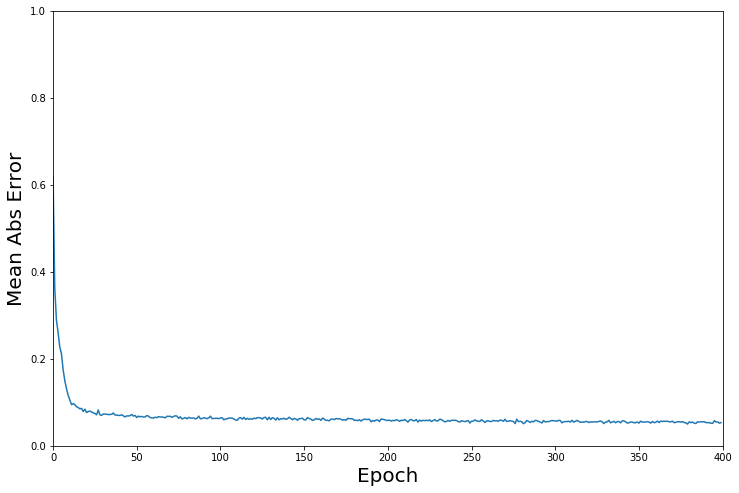

In [6]:
import matplotlib.pyplot as plt

def plot_hist(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure(figsize=(12,8))
  
  plt.xlabel('Epoch', fontsize=20)
  plt.ylabel('Mean Abs Error', fontsize=20)
  plt.plot(hist['epoch'], hist['mean_absolute_error'])
  
  plt.rc('xtick', labelsize=16)
  plt.rc('ytick', labelsize=16)
  
  plt.xlim([0,num_epochs])
  plt.ylim([0,1])
  
  plt.show()

plot_hist(history)

In [7]:
# Evaluate the model
i = 0

predicted = model.predict(test_data)

cfd_data = []
cd_pred = []

for e in test_targ:
  cfd_data.append(float(e))

for e in predicted:
  cd_pred.append(float(e))
  
diffList = []
errList = []

sum_err2 = 0.0
sum_dif2 = 0.0
count = 0

def sqr(s):
  return s*s

for i in range(0, len(cd_pred)):
  diff = float(test_targ[i]) - float(cd_pred[i])
  err = diff/float(test_targ[i])
  
  diffList.append(diff)
  errList.append(err)
  
  print(i, test_targ[i], cd_pred[i], diff, err)
  
  sum_err2 += sqr(err)
  sum_dif2 += sqr(diff)
  count += 1

def mag(li):
  lo = li
  for i in range(0, len(li)):
    lo[i] = np.sqrt(li[i]*li[i])
   
  return lo

rms_err = np.sqrt(sum_err2/count)
rms_dif = np.sqrt(sum_dif2/count)

print('-----\n')
print('Diff. min/max/rms', np.min(mag(diffList)), '/', np.max(mag(diffList)), '/', rms_dif)
print('Err.  min/max/rms', np.min(mag(errList)), '/', np.max(mag(errList)), '/', rms_err)

0 2.548737642471202 2.5364246368408203 0.012313005630381735 0.0048310212181914905
1 0.5191905381581705 0.5340225100517273 -0.014831971893556783 -0.02856749267075096
2 2.5750032470757622 2.5511081218719482 0.023895125203813983 0.009279648571686222
3 1.4219328735325054 1.4442753791809082 -0.02234250564840279 -0.015712771020545673
4 2.5455179098830305 2.4699299335479736 0.07558797633505687 0.029694537226230017
5 2.6297066112219447 2.7175514698028564 -0.08784485858091173 -0.03340481337577537
6 2.2499093918537754 2.564037561416626 -0.3141281695628506 -0.13961814226840039
7 0.5329735841486027 0.5278779864311218 0.005095597717480915 0.00956069469300409
8 0.7524433365308265 0.7717721462249756 -0.019328809694149074 -0.02568806015781256
9 2.6750662278826747 2.6280763149261475 0.04698991295652721 0.017565887702795272
10 2.213131602745718 2.229543924331665 -0.016412321585947076 -0.007415881444006835
11 2.430494542443493 2.4516799449920654 -0.021185402548572263 -0.008716498711934386
12 2.3842426141

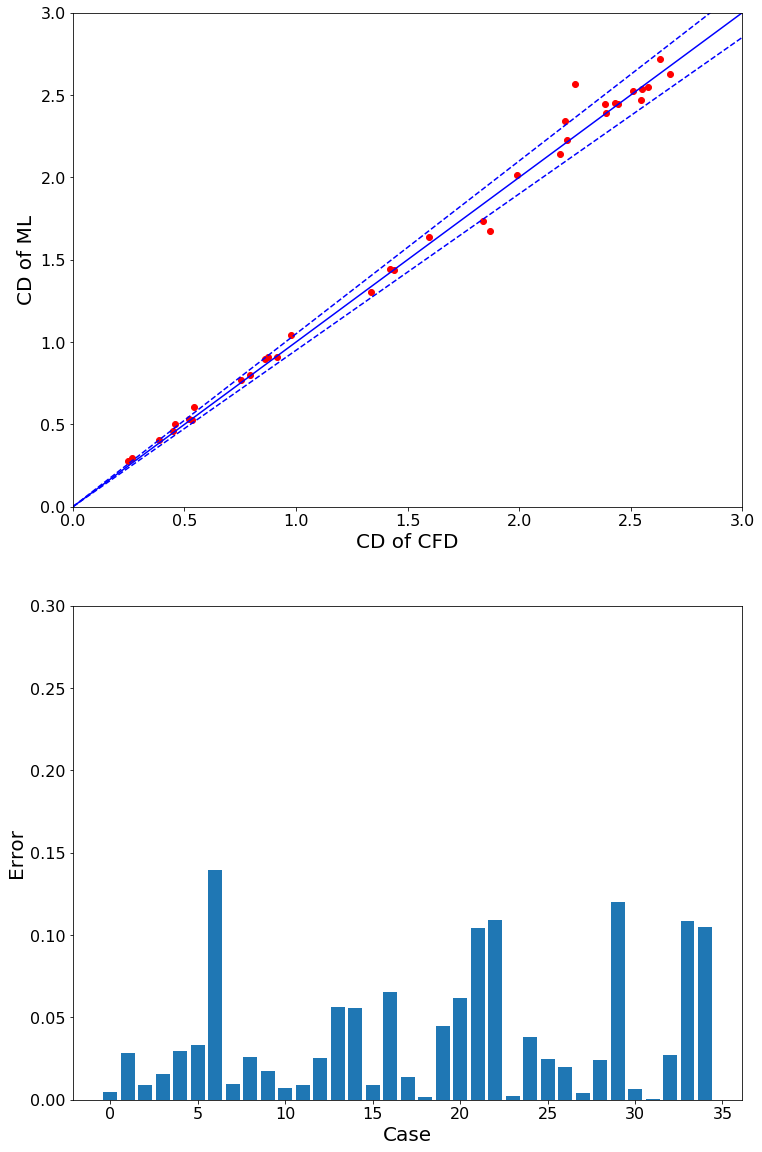

In [16]:


def plot_eval(x, y):
  plt.rcParams["figure.figsize"] = (12, 20)
  #plt.subplots_adjust(wspace=0.3)
  
  plt.subplot(2,1,1)
  plt.scatter(x, y, c='r')
  plt.plot([0,3], [0,3], 'b')
  plt.plot([0,3], [0,2.85], 'b--')
  plt.plot([0,3], [0,3.15], 'b--')
  
  plt.xlabel('CD of CFD', fontsize=20)
  plt.ylabel('CD of ML', fontsize=20)
  
  plt.xlim([0, 3])
  plt.ylim([0, 3])
  
  plt.subplot(2,1,2)
  plt.bar(range(len(errList)), errList)
  plt.xlabel('Case', fontsize=20)
  plt.ylabel('Error', fontsize=20)
  plt.ylim([0,0.3])
  
  plt.show()

plot_eval(cfd_data, cd_pred)